# CMF Rateslib Project

## 3 Sub-Projects:
    - Rates Models
    - FI Products
    - Curve Building
  


### Conventions
 - 1 year == 1.0
 - 1 month == 1/12
 - 1 day == 1/252
 - 0.02 == 2%

In [1]:
cmf_rateslib_root = '../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

In [2]:
import numpy as np

In [3]:
dt = 1/252
dW = np.random.randn()*dt
# Mean that dW is 1 day increment with unit annual vol

In [4]:
a=np.interp([2,1.5],[1,3,4],[5,6,7])

# Curves

In [5]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve

In [6]:
curve = BaseZeroCurve([0,2,5,10], [0.01, 0.02, 0.03, 0.03])

In [7]:
curve.df(0.15)

0.9983887993796147

In [8]:
curve.zero_rate(4.5)

0.028333333333333332

In [9]:
curve.fwd_rate(1, 1.5)

-0.026111111111111127

In [10]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


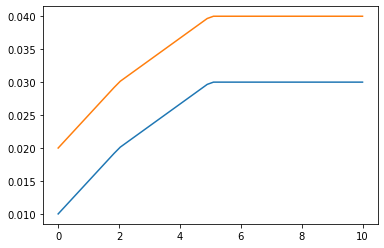

In [11]:
t = np.linspace(0, 10)
plot(t, curve.zero_rate(t), t, curve.bump(0.01).zero_rate(t))

In [12]:
spread_curve = BaseZeroCurve([0, 5, 10], [0.001, 0.002, 0.003])

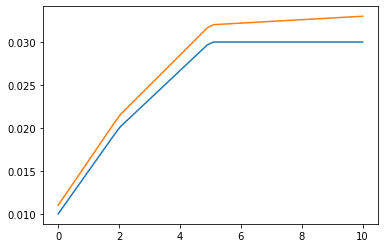

In [13]:
t = np.linspace(0, 10)
new_curve = curve + spread_curve
plot(t, curve.zero_rate(t), t, new_curve.zero_rate(t))

## Interpolation & extrapolation

In [14]:
from cmf_rateslib.curves.zero_curve import ZeroCurve

In [53]:
curve = ZeroCurve([3,5,10,15,19], [0.02, 0.03, 0.04,0.06,0.08])

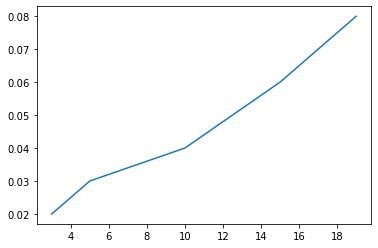

In [54]:
plt.plot(curve._maturities,curve._rates)

In [66]:
t_inter = np.linspace(0, 15)+3.1
t_extra1 = np.linspace(0,3)+19.1
t_extra2 = np.linspace(0,2.9)

t_all = np.append(t_extra2,t_inter)
t_all=np.append(t_all,t_extra1)

mode='zero_rate'
pow=2
rates1 = curve.extrapolate(t_extra2,mode=mode,pow=pow)
rates2 = curve.interpolate(t_inter,mode=mode,pow=pow)
rates3 = curve.extrapolate(t_extra1,mode=mode,pow=pow)

rates_all=np.append(rates1,rates2)
rates_all=np.append(rates_all,rates3)

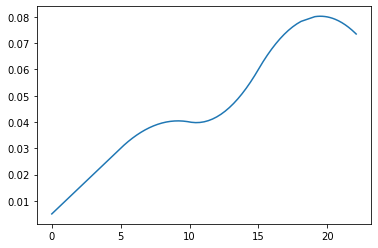

In [67]:
plt.plot(t_all,rates_all)

# Products

In [19]:
from cmf_rateslib.products.base_product import BaseProduct

In [20]:
p = BaseProduct()

In [21]:
p.get_cashflows()

In [22]:
p.pv()

0

In [23]:
from cmf_rateslib.products.bonds import ZCBond

In [24]:
bond = ZCBond(expiry=9)

In [25]:
bond.get_cashflows()

(array([9]), array([1]))

In [26]:
bond.pv(0, curve + spread_curve)

0.692671096970652

# Rates Models

 Simple PCA curve Generator
 
 $n$ zero rates and $m$ factors
 $$
     dZ = U dX
 $$
 
 $$
 dX_i = \sigma_i dW_i 
 $$
 
 Mean Reverting PCA curve Generator
 
 Same as abobe, but:
 $$
 dX_i = (\theta_i - X)dt + \sigma_i dW_i 
 $$

In [27]:
from cmf_rateslib.rates.simple_pca import SimplePCAModel

In [28]:
model = SimplePCAModel(
    maturities=[0, 2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1,1],
        [0,1,2,3],
        [2,1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001])

In [29]:
model.evolve_zero_curve(curve, 5, 1/252)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
np.array([[2,2,2], [3,3,3]]).T * np.array([2,2])

In [ ]:
bool()